資料：[ニューラルネットワークPlayGround](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.65342&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

0. 下準備

In [ ]:
# モジュールのインポート
import tensorflow as tf
from tensorflow.keras import layers, models, utils, optimizers, losses, metrics
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# データセットの読み込み(cifar10)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
#
train_images = train_images / 255.0
test_images = test_images / 255.0

# one-hotベクトルの作成
#
train_labels = utils.to_categorical(train_labels, num_classes=10)
test_labels = utils.to_categorical(test_labels, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


1. AIの構造

In [ ]:
# AIのモデルの定義
def build_model():
    input = layers.Input(shape = (32, 32, 3)) #
    x = layers.Flatten()(input) #
    output = layers.Dense(units=10, activation="softmax")(x) #
    return models.Model(input, output) #

model = build_model() #
model.summary() #

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        30,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

2. AIの学習

In [ ]:
epochs = 10 # エポック数(学習反復を行う回数)の指定
model.compile(loss = losses.CategoricalCrossentropy(), #
              optimizer = optimizers.Adam(learning_rate = 0.001), #
              metrics = [metrics.CategoricalAccuracy()]) #
# 学習
#
history = model.fit(x=train_images, y=train_labels, batch_size=8, epochs=epochs, validation_data=(test_images, test_labels)) #

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - categorical_accuracy: 0.2784 - loss: 2.2030 - val_categorical_accuracy: 0.3411 - val_loss: 2.0070
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - categorical_accuracy: 0.3265 - loss: 2.0764 - val_categorical_accuracy: 0.3162 - val_loss: 2.2475
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - categorical_accuracy: 0.3357 - loss: 2.0667 - val_categorical_accuracy: 0.3297 - val_loss: 1.9832
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - categorical_accuracy: 0.3472 - loss: 2.0391 - val_categorical_accuracy: 0.3062 - val_loss: 2.1746
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - categorical_accuracy: 0.3487 - loss: 2.0322 - val_categorical_accuracy: 0.3334 - val_loss: 2.0292
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - categorical_accuracy: 0.3556 - loss: 2.0071 - val_categorical_accuracy: 0.3340 - val_loss: 2.1550
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - categorical_a

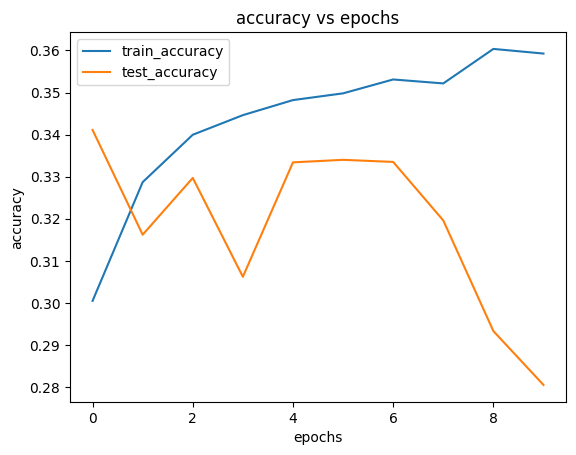

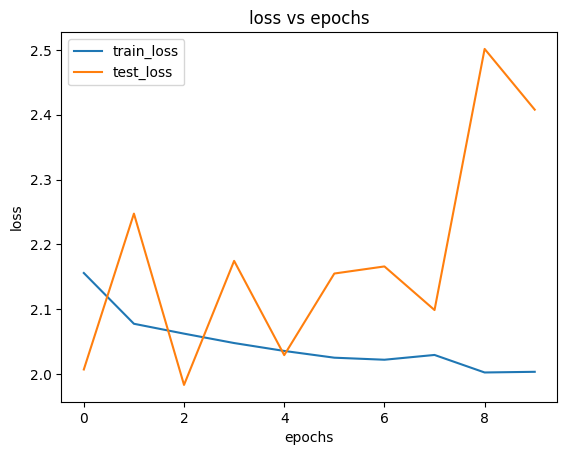

In [ ]:
# accuracyやlossを受け取る
accuracy, loss, val_accuracy, val_loss = history.history.values()

# グラフの出力
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("accuracy vs epochs") # タイトル
ax.plot(range(epochs), accuracy, label="train_accuracy") # 折れ線グラフ(引数は順にx,y,label)
ax.plot(range(epochs), val_accuracy, label="test_accuracy")# 折れ線グラフ(引数は順にx,y,label)
ax.set_xlabel("epochs") # x軸のラベル
ax.set_ylabel("accuracy") # y軸のラベル
ax.legend() # 折れ線グラフのラベルを表示
plt.show() # グラフの出力
# 上と同じ
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("loss vs epochs")
ax.plot(range(epochs), loss, label="train_loss")
ax.plot(range(epochs), val_loss, label="test_loss")
ax.set_xlabel("epochs")
ax.set_ylabel("loss")
ax.legend()
plt.show()

9943番目の画像
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


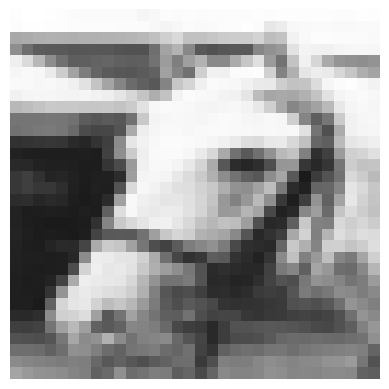

正解のラベル：7
予測のラベル：8


In [ ]:
# ランダムで整数を一つ生成
idx = np.random.randint(len(test_images))
print(f"{idx}番目の画像")
# 学習したモデルに画像を入力して推論結果を保存
result = model.predict(test_images[idx][tf.newaxis])

# 画像の見た目を確認
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(test_images[idx])
ax.axis("off")
plt.show()

# 正解のラベルとAIが予測したラベルを比べる
print(f"正解のラベル：{np.argmax(test_labels[idx])}")
print(f"予測のラベル：{np.argmax(result)}")